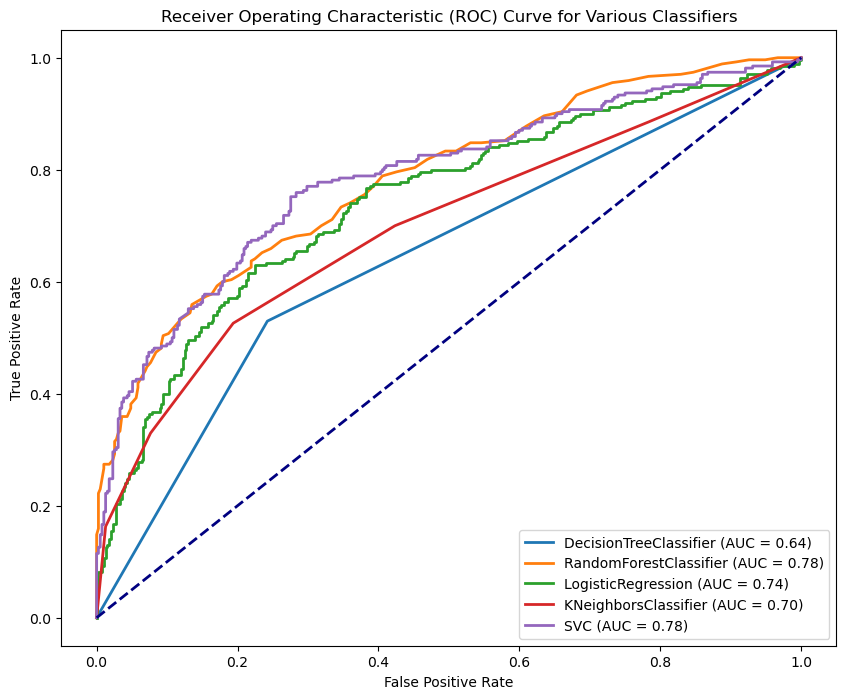

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/MitaliP001/patient-treatment-classification/main/training_set.csv")

# Encode categorical variables
label_encoder = LabelEncoder()
data['SEX'] = label_encoder.fit_transform(data['SEX'])

# Separate features and target variable
X = data[['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX']]
y = data['SOURCE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a list of classifiers
classifiers = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    LogisticRegression(random_state=42, max_iter=1000, solver='liblinear'),  # Increase max_iter and change solver
    KNeighborsClassifier(),
    SVC(probability=True, random_state=42)  # Note: SVC with probability=True for ROC curves
]

# Plot ROC curves for all classifiers
plt.figure(figsize=(10, 8))

for clf in classifiers:
    # Train the model
    clf.fit(X_train, y_train)

    # Scale the data for Logistic Regression and SVM
    if isinstance(clf, (LogisticRegression, SVC)):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        clf.fit(X_train_scaled, y_train)
        y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    else:
        # Predict probabilities for the positive class
        y_prob = clf.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{clf.__class__.__name__} (AUC = {roc_auc:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Various Classifiers')
plt.legend(loc="lower right")
plt.show()
